# UMAP Visualization
This notebook generates a UMAP visualization of the 768-dimensional output features of the CSMAE model for the training set.

In [1]:
import numpy as np
import umap
import umap.plot
from pathlib import Path
from eval_utils import read_data
import pandas as pd

/home/kleincode/miniconda3/envs/csmae/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/kleincode/miniconda3/envs/csmae/lib/python3.8/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


## Read the CSMAE feature vectors

In [2]:
EVERY_NTH_SAMPLE = 1

keys, labels, outputs = read_data(Path("features_out/CSMAE-CECD/train_CECD_19.pkl"), 19)
X = np.array(outputs[::EVERY_NTH_SAMPLE])
Y = np.array(labels[::EVERY_NTH_SAMPLE])
X.shape, Y.shape

((269695, 768), (269695, 19))

## Fit UMAP

In [3]:
mapper = umap.UMAP()
embedded = mapper.fit_transform(X)

/home/kleincode/.local/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Sort labels my relative frequency
More frequent labels show more interesting visualizations, as the class imbalance (between positive and negative samples) is lower. So we want to see those classes first.

In [4]:
from cProfile import label


BEN19_LABELS = {
    "Urban fabric": 0,
    "Industrial or commercial units": 1,
    "Arable land": 2,
    "Permanent crops": 3,
    "Pastures": 4,
    "Complex cultivation patterns": 5,
    "Land principally occupied by agriculture, with significant areas of natural vegetation": 6,
    "Agro-forestry areas": 7,
    "Broad-leaved forest": 8,
    "Coniferous forest": 9,
    "Mixed forest": 10,
    "Natural grassland and sparsely vegetated areas": 11,
    "Moors, heathland and sclerophyllous vegetation": 12,
    "Transitional woodland, shrub": 13,
    "Beaches, dunes, sands": 14,
    "Inland wetlands": 15,
    "Coastal wetlands": 16,
    "Inland waters": 17,
    "Marine waters": 18
}
label_counts = np.sum(Y, axis=0, dtype=int)
assert label_counts.shape == (19,)
label_counts = pd.DataFrame({"class_name": BEN19_LABELS.keys(), "count": label_counts, "class_index": BEN19_LABELS.values()})
label_counts.sort_values("count", ascending=False, inplace=True)
label_counts

class_name   count  class_index
2                                         Arable land  100394            2
10                                       Mixed forest   91930           10
9                                   Coniferous forest   86569            9
13                       Transitional woodland, shrub   77593           13
8                                 Broad-leaved forest   73411            8
6   Land principally occupied by agriculture, with...   67260            6
5                        Complex cultivation patterns   53534            5
4                                            Pastures   50981            4
18                                      Marine waters   39114           18
0                                        Urban fabric   38783            0
17                                      Inland waters   35349           17
3                                     Permanent crops   15862            3
7                                 Agro-forestry areas   15790            7
15                                    Inland wetlands   11620           15
12     Moors, heathland and sclerophyllous vegetation    8438           12
11     Natural grassland and sparsely vegetated areas    6663           11
1                      Industrial or commercial units    6182            1
14                              Beaches, dunes, sands    1197           14
16                                   Coastal wetlands    1037           16

## Show all classes

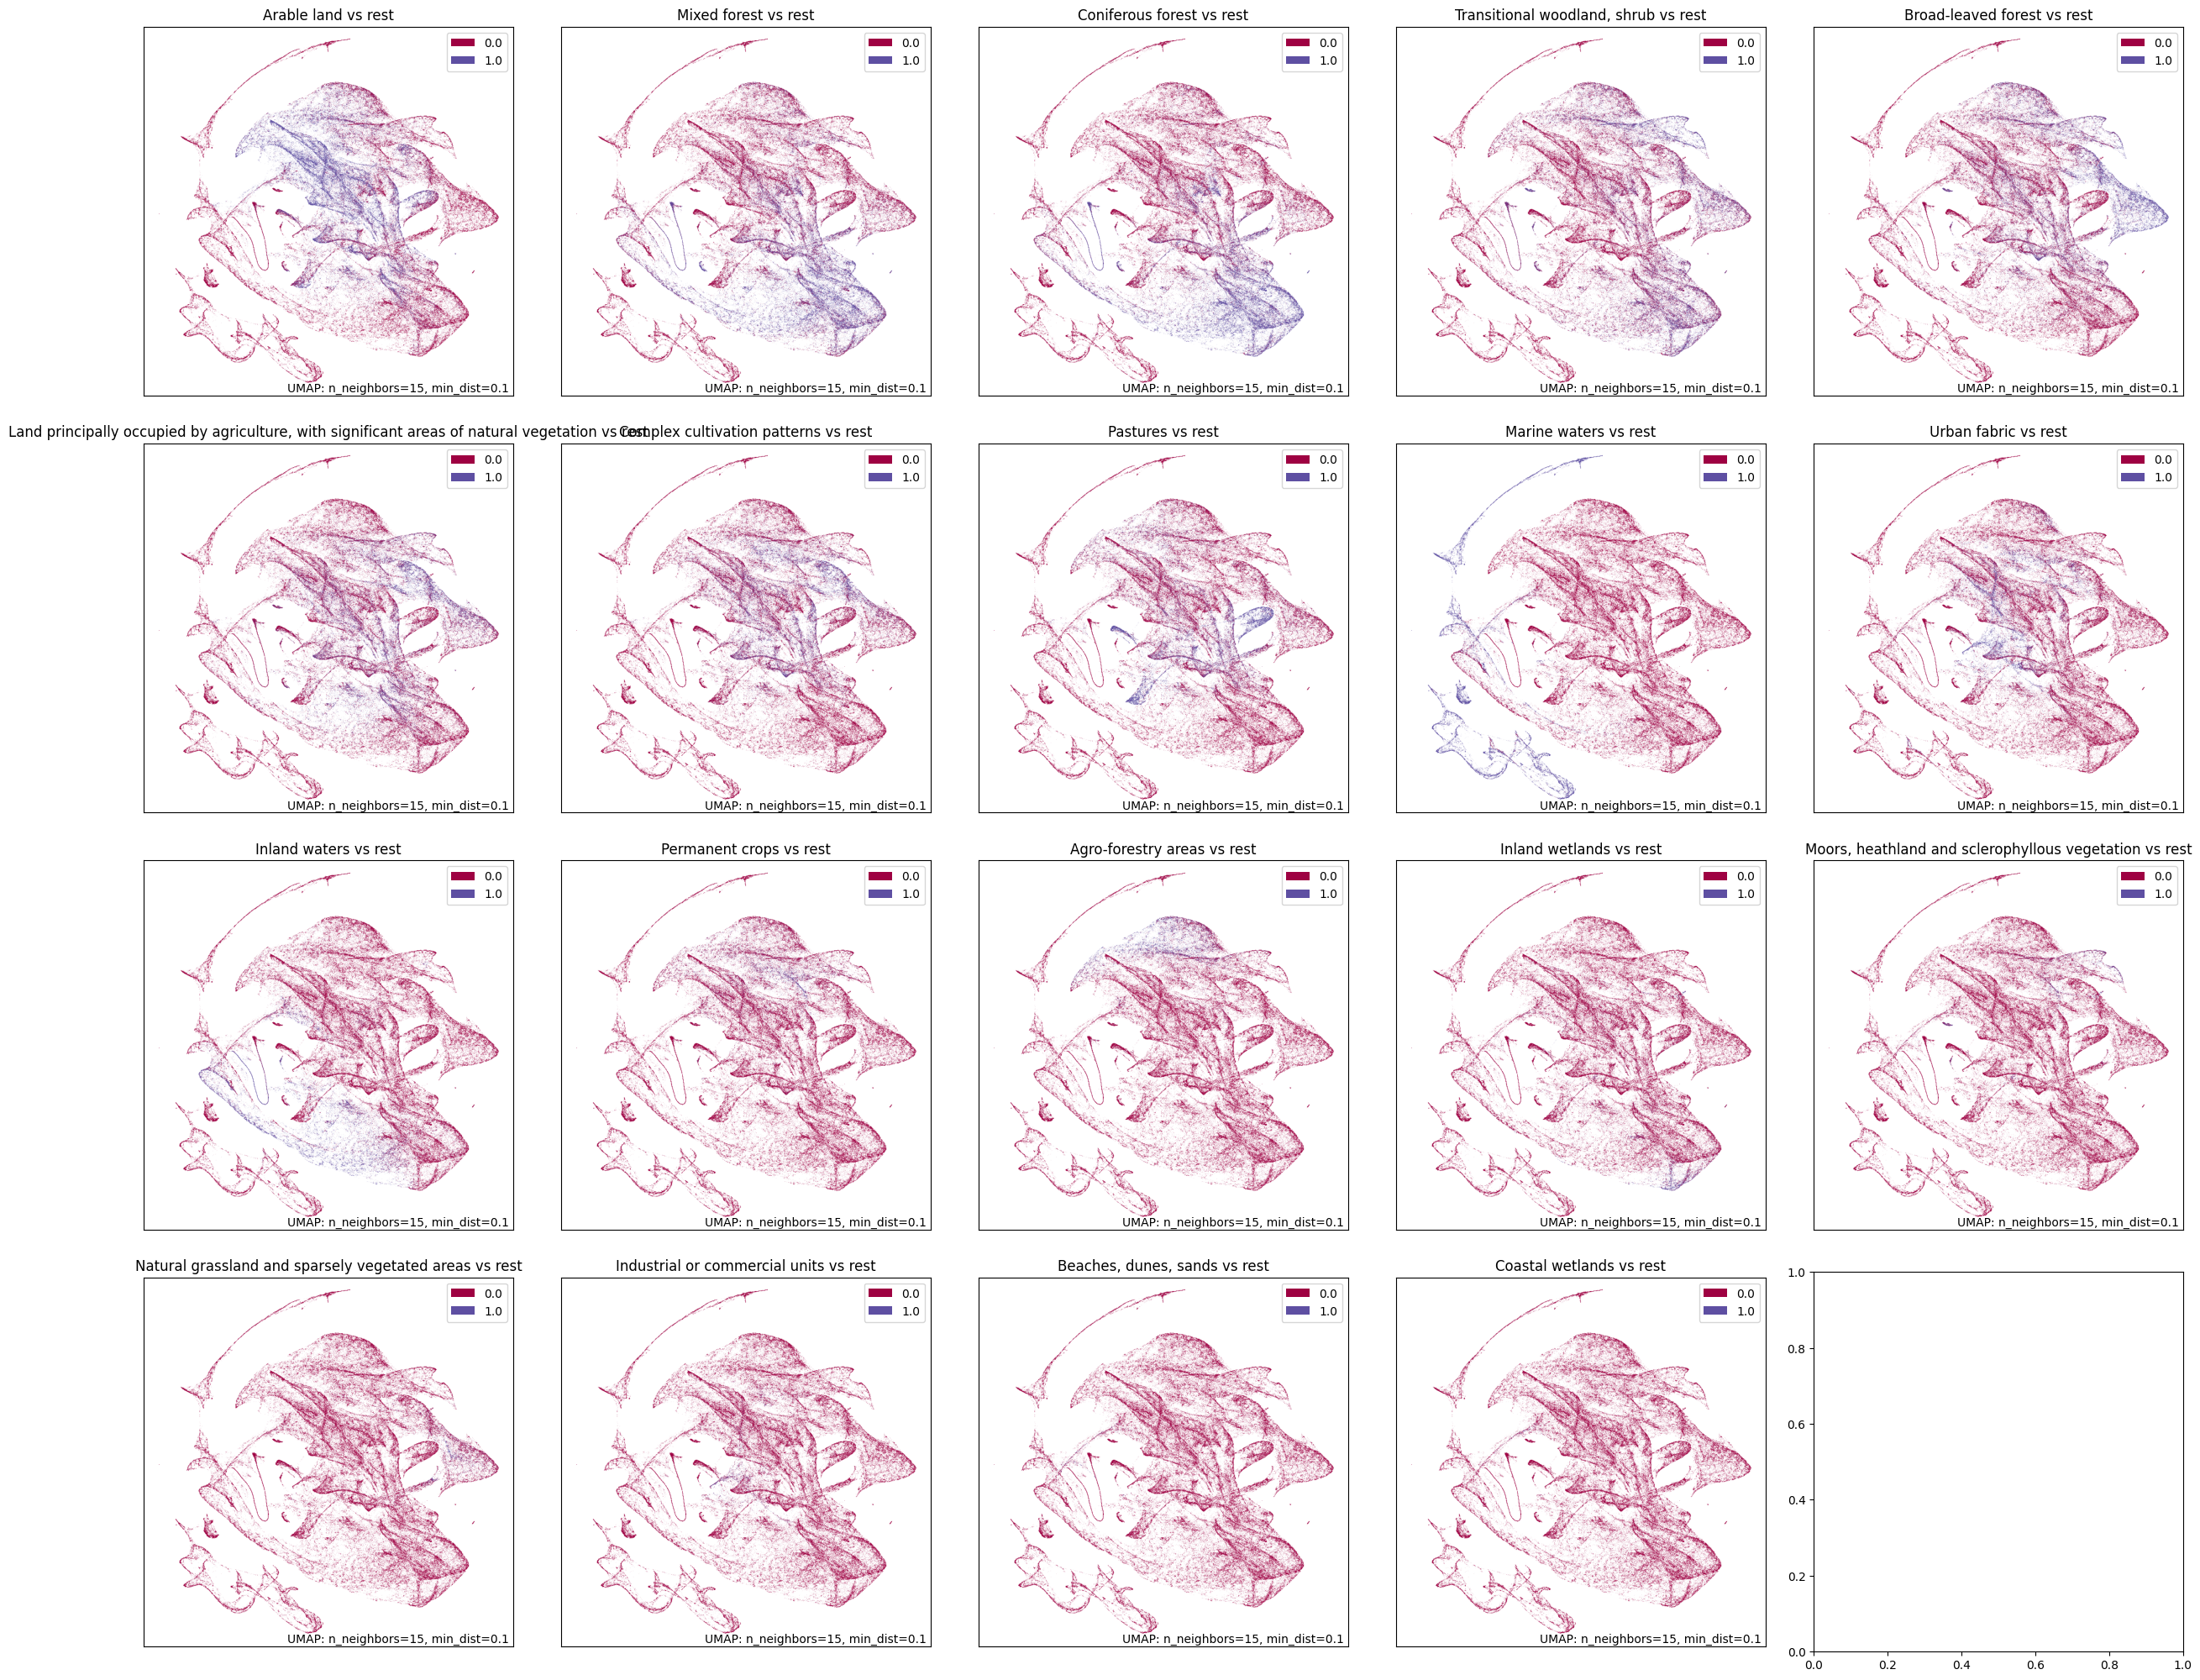

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 5, squeeze=True)
fig.set_size_inches(25, 20)
fig.tight_layout()
axs = axs.flatten()[:19]
for i, ax in enumerate(axs):
    class_idx, class_name = label_counts.iloc[i].class_index, label_counts.iloc[i].class_name
    umap.plot.points(mapper, labels=Y[:,class_idx], ax=ax)
    ax.set_title(f"{class_name} vs rest")
fig.savefig("imgs/umap_viz.pdf")
fig.savefig("imgs/umap_viz.png")
plt.show()

## Class-wise visualizations

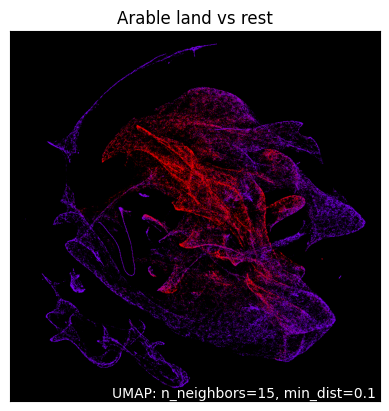

In [6]:
fig, ax = plt.subplots()
umap.plot.points(mapper, labels=Y[:,2], ax=ax, theme="fire", show_legend=False)
ax.set_title("Arable land vs rest")
fig.savefig("imgs/umap_viz_arable_land.pdf", bbox_inches="tight")

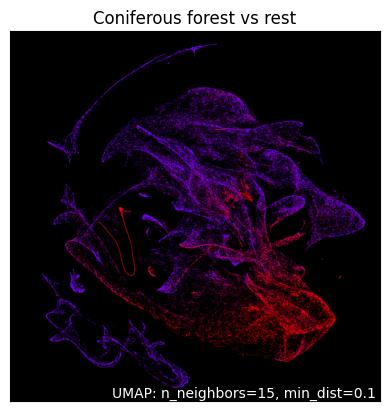

In [7]:
fig, ax = plt.subplots()
umap.plot.points(mapper, labels=Y[:,9], ax=ax, theme="fire", show_legend=False)
ax.set_title("Coniferous forest vs rest")
fig.savefig("imgs/umap_viz_coniferous_forest.pdf", bbox_inches="tight")

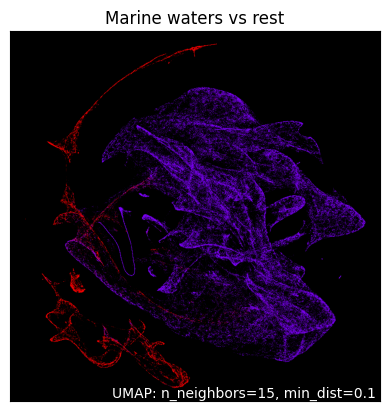

In [8]:
fig, ax = plt.subplots()
umap.plot.points(mapper, labels=Y[:,18], ax=ax, theme="fire", show_legend=False)
ax.set_title("Marine waters vs rest")
fig.savefig("imgs/umap_viz_marine_waters.pdf", bbox_inches="tight")

Showing all classes again, but with the fire theme for better visibility:

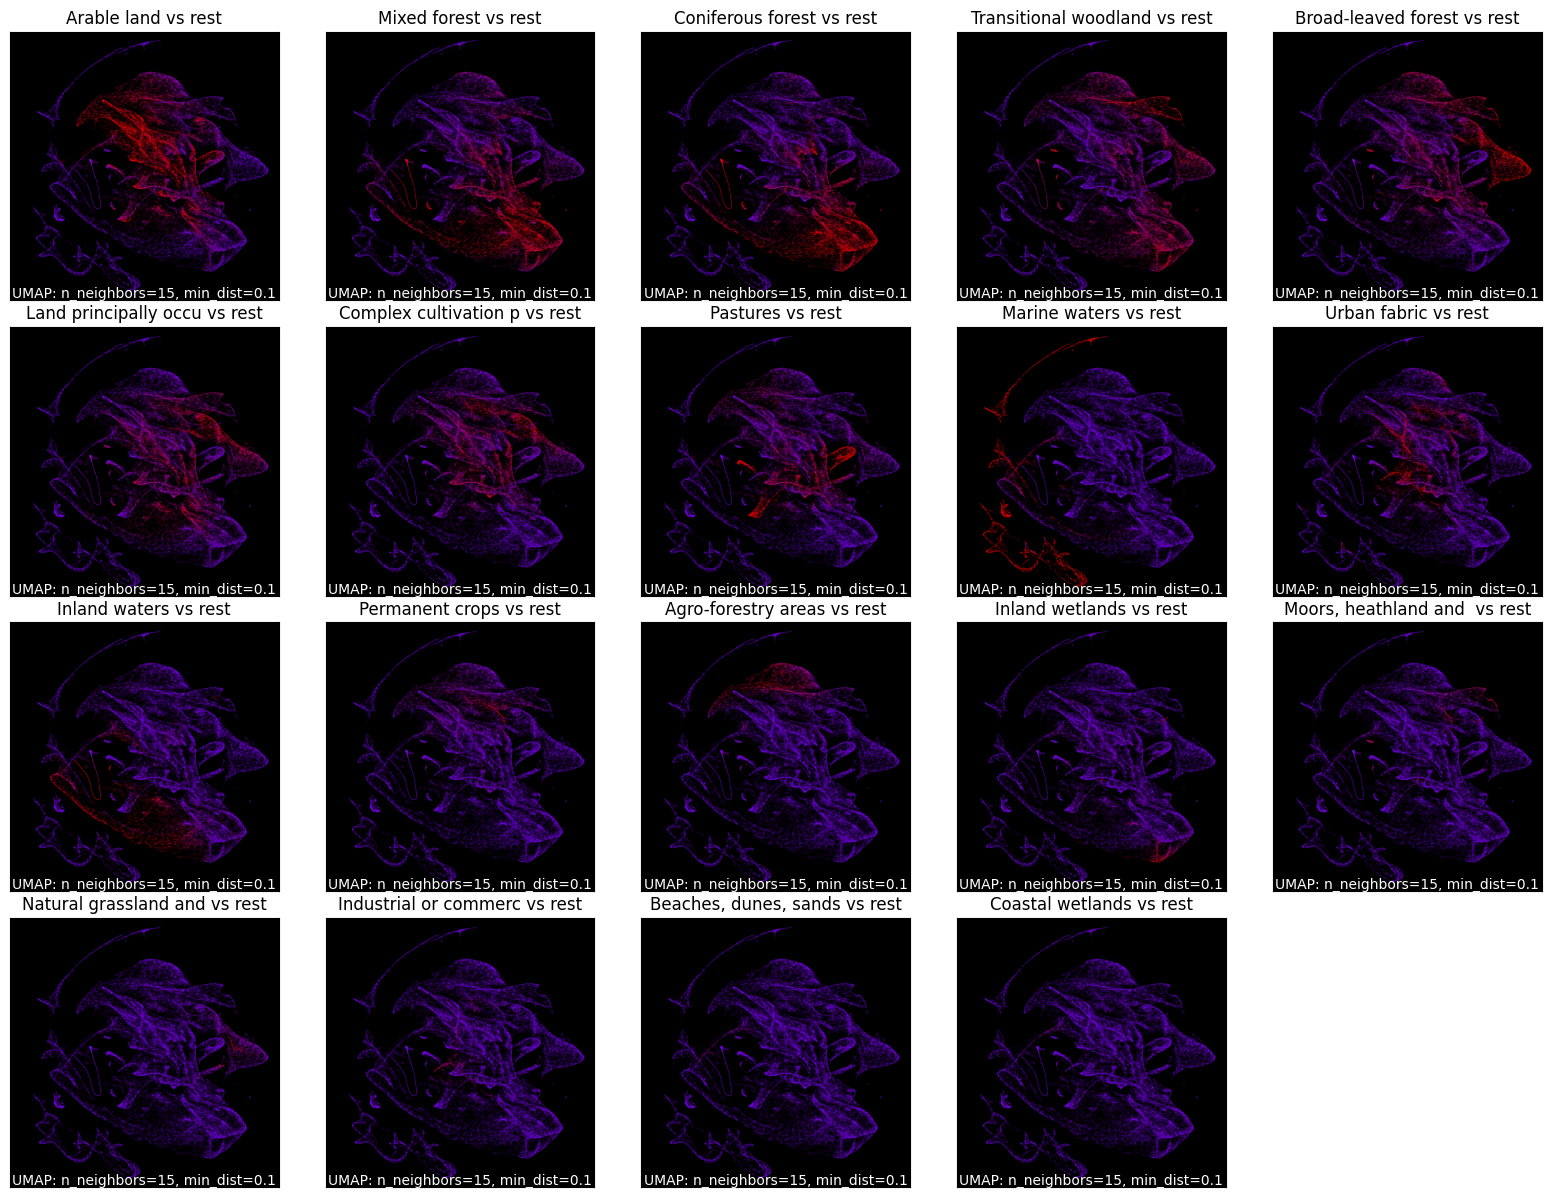

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 5, squeeze=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.set_size_inches(20, 15)
#fig.tight_layout()
fig.delaxes(axs[-1,-1])
axs = axs.flatten()[:19]
for i, ax in enumerate(axs):
    class_idx, class_name = label_counts.iloc[i].class_index, label_counts.iloc[i].class_name
    umap.plot.points(mapper, labels=Y[:,class_idx], ax=ax, theme="fire", show_legend=False)
    ax.set_title(f"{class_name[:21]} vs rest")
fig.savefig("imgs/umap_viz2.pdf", bbox_inches="tight")
fig.savefig("imgs/umap_viz2.png", bbox_inches="tight")
plt.show()

## Some other interesting visualizations

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

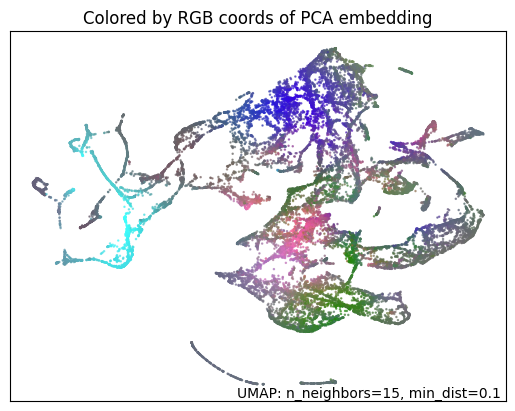

In [9]:
umap.plot.diagnostic(mapper, diagnostic_type="pca")

Fitting all the classes into a simple image is hard, but let's try:

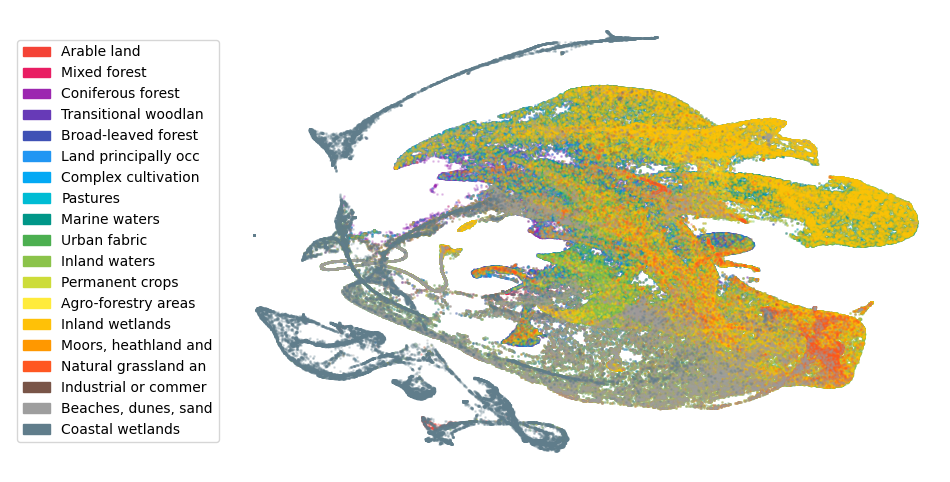

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = [
    "#F44336", # red
    "#E91E63", # pink
    "#9C27B0", # purple
    "#673AB7", # deep purple
    "#3F51B5", # indigo
    "#2196F3", # blue
    "#03A9F4", # light blue
    "#00BCD4", # cyan
    "#009688", # teal
    "#4CAF50", # green
    "#8BC34A", # light green
    "#CDDC39", # lime
    "#FFEB3B", # yellow
    "#FFC107", # amber
    "#FF9800", # orange
    "#FF5722", # deep orange
    "#795548", # brown
    "#9E9E9E", # grey
    "#607D8B"  # blue grey
]

fig, ax = plt.subplots(figsize=(12, 6))
handles = []
for i in range(19):
    class_idx, class_name = label_counts.iloc[i].class_index, label_counts.iloc[i].class_name
    points = embedded[Y[:,i]==1]
    ax.scatter(points[:,0], points[:,1], s=1, alpha=0.2, c=colors[i])
    handles.append(mpatches.Patch(color=colors[i], label=class_name[:20]))
ax.legend(handles=handles, loc="center left")
ax.set_xlim(-16, 23)
ax.axis("off")
fig.savefig("imgs/umap_viz_all_classes.pdf")
fig.savefig("imgs/umap_viz_all_classes.png")
plt.show()

<Axes: >

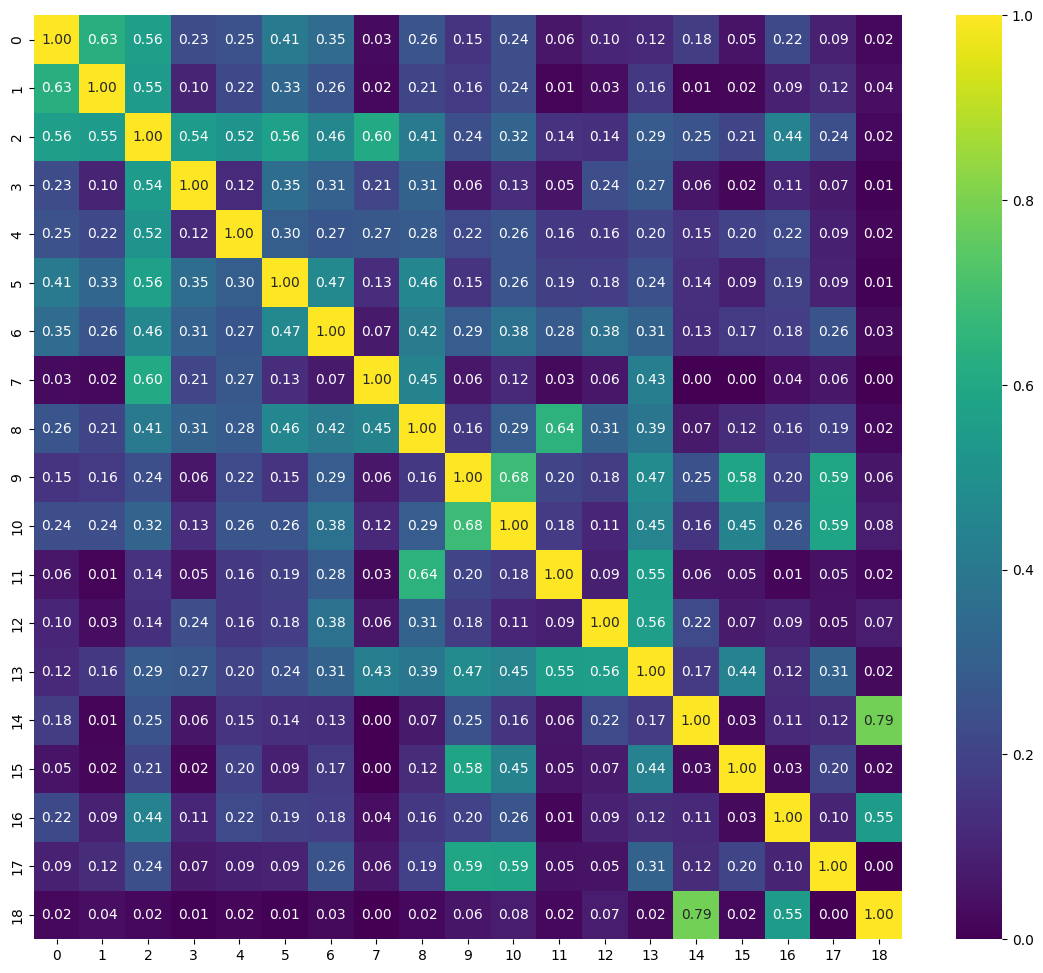

In [24]:
mat = np.zeros((19, 19), dtype=float)
for i in range(19):
    for j in range(19):
        common_samples = np.sum(np.logical_and(Y[:,i], Y[:,j])) / min(np.sum(Y[:,i]), np.sum(Y[:,j]))
        mat[i,j] = common_samples

from tkinter import font
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(mat, cmap="viridis", annot=True, fmt=".2f")
plt.figure("Common samples between classes")